# 1. Exploratory Data Analysis


In [1]:
# Import libraries

# Utilities
import pandas as pd
pd.options.display.max_colwidth = 300
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# SKlearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Scipy
from scipy import stats

In [2]:
# load the data
df = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
# Viewing the top 5 rows
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Display shape of data frame
df.shape

(205, 26)

<AxesSubplot:>

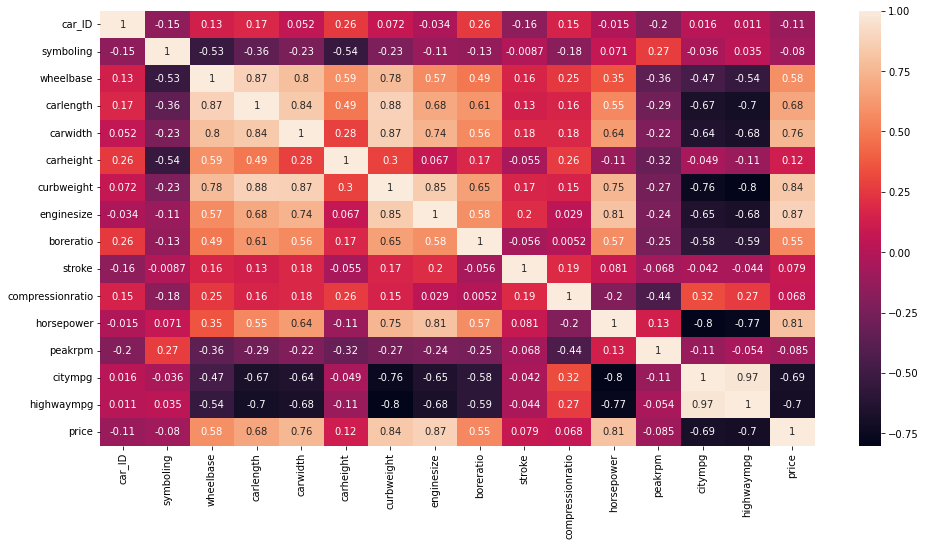

In [5]:
# Display correlation of data frame

plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

In [6]:
# Pearson Coefficient

pearson_coef, p_value = stats.pearsonr(df['wheelbase'], df['price'])
print("The Pearson Correlation Coefficient for wheelbase vs price is: ", pearson_coef, "with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(df['carlength'], df['price'])
print("The Pearson Correlation Coefficient for carlength vs price is: ", pearson_coef, "with a P-value of P =", p_value) 

pearson_coef, p_value = stats.pearsonr(df['carwidth'], df['price'])
print("The Pearson Correlation Coefficient for carwidth vs price is: ", pearson_coef, "with a P-value of P =", p_value) 

pearson_coef, p_value = stats.pearsonr(df['curbweight'], df['price'])
print("The Pearson Correlation Coefficient for curbweight vs price is: ", pearson_coef, "with a P-value of P =", p_value) 

pearson_coef, p_value = stats.pearsonr(df['enginesize'], df['price'])
print("The Pearson Correlation Coefficient for enginesize vs price is: ", pearson_coef, "with a P-value of P =", p_value)

pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient for horsepower vs price is: ", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient for wheelbase vs price is:  0.5778155982921502 with a P-value of P = 1.1828204863377837e-19
The Pearson Correlation Coefficient for carlength vs price is:  0.6829200156779621 with a P-value of P = 1.678706624074708e-29
The Pearson Correlation Coefficient for carwidth vs price is:  0.7593252997415116 with a P-value of P = 9.627437876119569e-40
The Pearson Correlation Coefficient for curbweight vs price is:  0.8353048793372966 with a P-value of P = 1.2144448264032206e-54
The Pearson Correlation Coefficient for enginesize vs price is:  0.8741448025245118 with a P-value of P = 1.3547637598647268e-65
The Pearson Correlation Coefficient for horsepower vs price is:  0.8081388225362219 with a P-value of P = 1.4834365732938807e-48


# 2. Data Cleaning/Preparation

In [7]:
# Display NA values in rows 
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
# Drop non numeric, unnecessary attributes to perform MinMax Scaler

df.drop(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation','enginetype','cylindernumber','fuelsystem'], inplace=True, axis=1)

In [11]:
# Apply normalization

scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142


<AxesSubplot:>

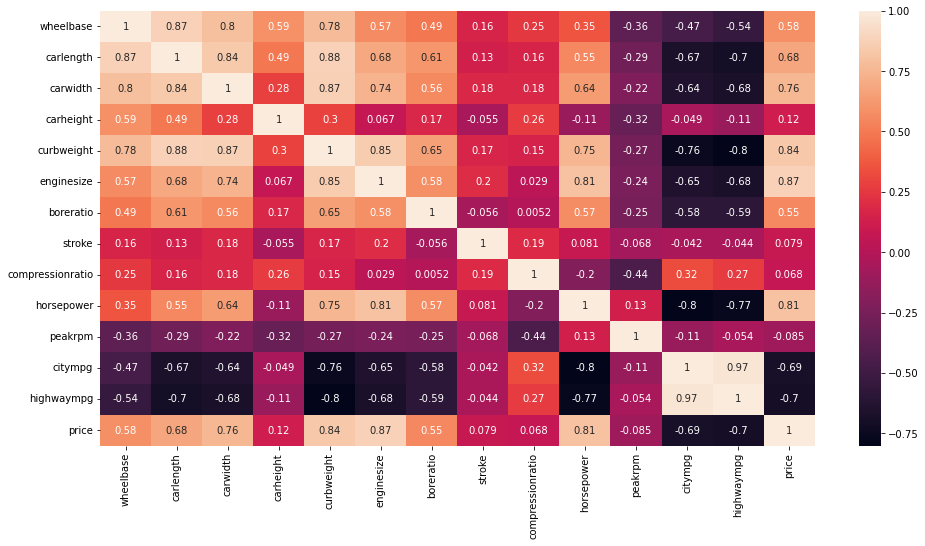

In [12]:
# "Cleaned" df heatmap

plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

In [13]:
# Divide the independent and dependent variable into two separate variables.

X = df[['wheelbase', 'carlength', 'carwidth', 'curbweight','enginesize', 'horsepower']]
Y = df['price']

# 3. Model Training & Evaluation

In [14]:
# Assigning Training & Test Variable
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

# Define and Initiate the model
regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
# Create comparison table

y_pred = regressor.predict(X_test)

compare_df = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted Output": y_pred})

In [16]:
compare_df

,Desired Output (Actuals),Predicted Output
15,0.636562,0.512178
9,0.316299,0.341755
100,0.110000,0.152089
132,0.167122,0.205668
68,0.574202,0.469051
95,0.066556,0.035451
159,0.066283,0.066961
162,0.102775,0.054890
147,0.126111,0.136655
182,0.065960,0.050842


In [17]:
# Coeffecients

print('Coefficients: \n', regressor.coef_)

print('Intercept: \n', regressor.intercept_)

# The mean squared error
print('Mean absolute error:',mean_absolute_error(y_test, y_pred))

# r2 Score

r2_score = regressor.score(X_test,y_test)
print(r2_score*100,'%')

Coefficients: 
 [ 0.02175424 -0.03937335  0.18820628  0.14757548  0.51055982  0.32189508]
Intercept: 
 -0.138491856274818
Mean absolute error: 0.066481360549147
82.24558811185291 %


# 4. Model Visualisation

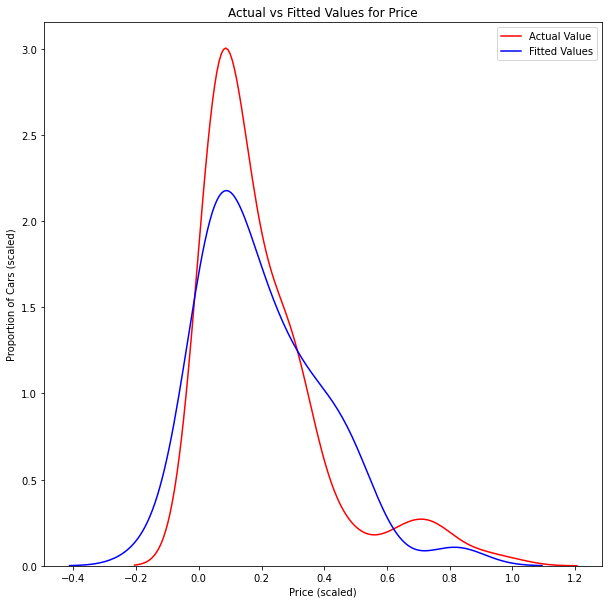

In [18]:
# Plotting the distribution plot (fitted vs actual)

plt.figure(figsize=(10, 10))

ax1 = sns.kdeplot(df['price'], color="r", label="Actual Value")
sns.kdeplot(y_pred, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (scaled)')
plt.ylabel('Proportion of Cars (scaled)')
plt.legend()
plt.show()


#### Conclusion

From the scores, it is observed that the machine was able to achieve a r2 score of 82.24%, suggesting that although there are some variances, the model trained for the most part remained accurate.

